In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

from lampy import data
from lampy import metrics

In [2]:
data_file = 'data/636f6a2e-3a48-4801-afce-05c864adc60e-lampy_2019.csv'
sid = 'y7e4onsytkb3ydonflz5kcbcigkh5ulo'
target = 'pm10'
attributes = [target, 'o3', 'pm2p5', 'no2', 'so2']

df = data.read_2018_data(data_file).loc[sid, attributes]
resampled_df = data.resample_data(df)
X, y = data.create_dataset(resampled_df)
X_tr, X_val, y_tr, y_val = data.train_validation_split(X, y)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_tr = X_scaler.fit_transform(X_tr)
X_val = X_scaler.transform(X_val)

y_tr = y_scaler.fit_transform(y_tr)
y_val = y_scaler.transform(y_val)

In [3]:
windows = list(range(1, 100))
linear_stats = pd.DataFrame(index=windows, columns=['RMSE'], dtype=np.float)
linear_stats.index.name='window'

for window in windows:
    X_tr_trans, y_tr_trans = data.transform_dataset(X_tr, y_tr, window)
    X_val_trans, y_val_trans = data.transform_dataset(X_val, y_val, window)

    linear = linear_model.LinearRegression()
    linear.fit(X_tr_trans, y_tr_trans)

    y_pred_trans = linear.predict(X_val_trans)

    linear_stats.loc[window] = metrics.rmse(y_val_trans, y_pred_trans)

linear_stats.loc[linear_stats.idxmin()]

,RMSE
window,
2,0.636928


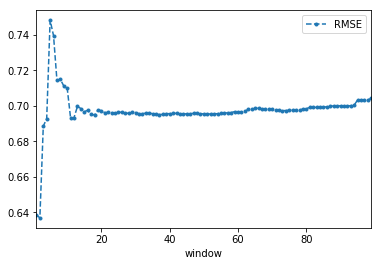

In [4]:
linear_stats.plot(style='.--');